## Part 1: create txt file with train and val id's of data

In [1]:
import os.path as osp
import os
import random as rand

In [2]:
root_path = "S2DSdevkit"
part_path = "part2"
images_path = "images"
labels_path = "labels"

folder_segmentation = "Segmentation"

In [3]:
images_dir_path = osp.join(root_path, part_path, images_path)

In [4]:
# create list of files in the folder
list_paths = os.listdir(images_dir_path)
# get only images ending on .jpg
list_images_with_postfix = list((filter(lambda k: '.jpg' in k, list_paths)))
# remove the file ending .jpg
list_images_without_postfix = list((map(lambda k: osp.splitext(k)[0], list_paths)))
for ele in range(5):
    print(list_images_without_postfix[ele])

01 (231)
01 (209)
01 (496)
01 (419)
01 (391)


In [5]:
# shuffel list
rand.shuffle(list_images_without_postfix)
for ele in range(5):
    print(list_images_without_postfix[ele])
print("\nTotal number of elements: " + str(len(list_images_without_postfix)) )

01 (242)
01 (496)
01 (412)
01 (407)
01 (316)

Total number of elements: 357


In [6]:
train_txt_path = osp.join(root_path, part_path, folder_segmentation, "train.txt")
with open(train_txt_path,'w') as f:
    f.write('\n'.join(list_images_without_postfix[:100]))

In [7]:
val_txt_path = osp.join(root_path, part_path, folder_segmentation, "val.txt")
with open(val_txt_path,'w') as f:
    f.write('\n'.join(list_images_without_postfix[100:]))

## Part 2: load data using yaml file and visulize some data pairs.

In [8]:
from libs.datasets import get_dataset
from addict import Dict
import yaml
import torch
import numpy as np

In [9]:
# Load data using yaml and show some
config_path = 'configs/S2DS.yaml'
with open(config_path, 'r') as file:
    CONFIG = Dict(yaml.load(file, Loader=yaml.FullLoader))

for key in CONFIG:
    print(key + ": " + str(CONFIG[key]))
    print("--------")

EXP: {'ID': 'S2DS', 'OUTPUT_DIR': 'data'}
--------
DATASET: {'NAME': 'S2DS', 'ROOT': 'S2DSdevkit/', 'PART': 2, 'LABELS': './data/datasets/S2DS/labels.txt', 'N_CLASSES': 7, 'IGNORE_LABEL': 255, 'SCALES': [0.5, 0.75, 1.0, 1.25, 1.5], 'SPLIT': {'TRAIN': 'train', 'VAL': 'val', 'TEST': 'test'}}
--------
DATALOADER: {'NUM_WORKERS': 0}
--------
IMAGE: {'MEAN': {'R': 122.675, 'G': 116.669, 'B': 104.008}, 'SIZE': {'BASE': None, 'TRAIN': 321, 'TEST': 513}}
--------
MODEL: {'NAME': 'DeepLabV2_ResNet101_MSC', 'N_BLOCKS': [3, 4, 23, 3], 'ATROUS_RATES': [6, 12, 18, 24], 'INIT_MODEL': 'data/models/coco/deeplabv1_resnet101/caffemodel/deeplabv1_resnet101-coco.pth'}
--------
SOLVER: {'BATCH_SIZE': {'TRAIN': 5, 'TEST': 1}, 'ITER_MAX': 20000, 'ITER_SIZE': 2, 'ITER_SAVE': 5000, 'ITER_TB': 100, 'LR_DECAY': 10, 'LR': 0.00025, 'MOMENTUM': 0.9, 'OPTIMIZER': 'sgd', 'POLY_POWER': 0.9, 'WEIGHT_DECAY': 0.0005, 'AVERAGE_LOSS': 20}
--------
CRF: {'ITER_MAX': 10, 'POS_W': 3, 'POS_XY_STD': 1, 'BI_W': 4, 'BI_XY_STD': 6

In [10]:
# Dataset
dataset = get_dataset(CONFIG.DATASET.NAME)(
    root=CONFIG.DATASET.ROOT,
    part=CONFIG.DATASET.PART,
    split=CONFIG.DATASET.SPLIT.TRAIN,
    ignore_label=CONFIG.DATASET.IGNORE_LABEL,
    mean_bgr=(CONFIG.IMAGE.MEAN.B, CONFIG.IMAGE.MEAN.G, CONFIG.IMAGE.MEAN.R),
    augment=False,
    base_size=CONFIG.IMAGE.SIZE.BASE,
    crop_size=CONFIG.IMAGE.SIZE.TRAIN,
    scales=CONFIG.DATASET.SCALES,
    flip=True,
)
print(dataset)

Dataset: S2DS
    # data: 100
    Split: train
    Root: S2DSdevkit/part2


In [11]:
# DataLoader
loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=1,#CONFIG.SOLVER.BATCH_SIZE.TRAIN,
    num_workers=CONFIG.DATALOADER.NUM_WORKERS,
    shuffle=True,
)
loader_iter = iter(loader)

In [12]:
# Load data
image_ids, images, labels = next(loader_iter)

01 (219)
S2DSdevkit/part2/images/01 (219).jpg
S2DSdevkit/part2/labels/01 (219).png


In [13]:
print("ID: " + str(image_ids))
print("Image shape: " + str(images.shape))
print("Label shape: " + str(labels.shape))

ID: ('01 (219)',)
Image shape: torch.Size([1, 3, 1944, 2592])
Label shape: torch.Size([1, 1944, 2592, 4])


In [14]:
first_img = images[0].permute(1,2,0)
first_lbl = labels[0]
# choose first element of the batch
print("ID: " + str(image_ids))
print("Image shape: " + str(first_img.shape))
print("Label shape: " + str(first_lbl.shape))

ID: ('01 (219)',)
Image shape: torch.Size([1944, 2592, 3])
Label shape: torch.Size([1944, 2592, 4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


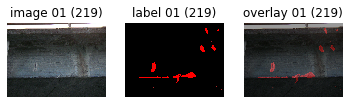

In [15]:
dataset.show_pair(image_ids, images, labels)

In [16]:
testlst = range(1,10)